In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt 
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist

In [140]:

dataset = pd.read_excel('transactiondata.xlsx')

In [141]:
transactiondata = dataset

In [142]:
customer_data = pd.read_csv('purchasebehaviour.csv')

In [143]:
transactiondata.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [204]:
transactiondata.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [205]:
transactiondata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   STORE_NBR       246740 non-null  int64         
 1   LYLTY_CARD_NBR  246740 non-null  int64         
 2   TXN_ID          246740 non-null  int64         
 3   PROD_NBR        246740 non-null  int64         
 4   PROD_NAME       246740 non-null  object        
 5   PROD_QTY        246740 non-null  int64         
 6   TOT_SALES       246740 non-null  float64       
 7   REAL_DATE       246740 non-null  datetime64[ns]
 8   PACK_SIZE       246740 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 18.8+ MB


In [144]:
len(transactiondata)

264836

In [145]:
#Examine Data types are as expected
#Date is in a wierd format whihch we'll have to sort out, 
#we'll add brand as a column and create a packet size column as well
transactiondata.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [146]:
#Sorting out the Date and removing the old date column
transactiondata['REAL_DATE'] = pd.TimedeltaIndex(transactiondata['DATE'], unit='d') + dt.datetime(1900,1,1)
transactiondata.drop(columns='DATE', axis=1, inplace=True)
transactiondata.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-19
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-20


In [206]:
transactiondata['REAL_DATE'].describe()

/var/folders/49/pvcbqc9960s20_04s4pktqph0000gn/T/ipykernel_19075/2909518448.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactiondata['REAL_DATE'].describe()


count                  246740
unique                    364
top       2018-12-26 00:00:00
freq                      865
first     2018-07-03 00:00:00
last      2019-07-02 00:00:00
Name: REAL_DATE, dtype: object

In [147]:
#Split the chip packet size into it's own column
transactiondata["PACK_SIZE"] = transactiondata['PROD_NAME'].str.extract('(\d+)')
transactiondata["PACK_SIZE"] = pd.to_numeric(transactiondata['PACK_SIZE'])
transactiondata.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE,PACK_SIZE
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,175
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,175
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22,170
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-19,175
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-20,150


<AxesSubplot:ylabel='Frequency'>

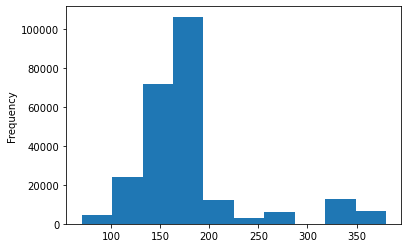

In [207]:
#Histogram of packet size
transactiondata['PACK_SIZE'].plot.hist()

In [148]:
#Remove the packet size from the end of the product name, tidy up product names to remove special characters
transactiondata['PROD_NAME'] = transactiondata['PROD_NAME'].apply(lambda x: re.sub('\d\w+', ' ', x))
transactiondata['PROD_NAME'] = transactiondata['PROD_NAME'].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
transactiondata.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE,PACK_SIZE
0,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,2018-10-19,175
1,1,1307,348,66,CCs Nacho Cheese,3,6.3,2019-05-16,175
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,2019-05-22,170
3,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,2018-08-19,175
4,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,2018-08-20,150


In [149]:
transactiondata['PROD_NBR'].nunique()

114

In [150]:
#Checking the number of product numbers matches the number of product names
transactiondata['PROD_NAME'].nunique()

114

In [151]:
#Pull brand from the product name and create a new column
prod_brand = transactiondata['PROD_NAME'].tolist()
brand_list = []
for brand in prod_brand:
    brand_list.append(brand.split()[0])




In [154]:
#Breadown of most frequent first word which corresponds to brand
wordFrequency = fdist(brand_list)
freq_df = pd.DataFrame(list(wordFrequency.items()), columns = ["Word", "Frequency"]).sort_values(by = 'Frequency', ascending = False)
freq_df


,Word,Frequency
3,Kettle,41288
2,Smiths,28860
15,Pringles,25102
6,Doritos,24962
9,Thins,14075
24,RRD,11894
17,Infuzions,11057
8,WW,10320
21,Cobs,9693
25,Tostitos,9471


In [157]:
#Drop rows containng Salsa
transactiondata = transactiondata[~transactiondata['PROD_NAME'].str.contains("Salsa")]
transactiondata


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE,PACK_SIZE
0,1,1000,1,5,natural chip compny seasalt,2,6.0,2018-10-19,175
1,1,1307,348,66,ccs nacho cheese,3,6.3,2019-05-16,175
2,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,2019-05-22,170
3,2,2373,974,69,smiths chip thinly s cream onion,5,15.0,2018-08-19,175
4,2,2426,1038,108,kettle tortilla chpshny jlpno chili,3,13.8,2018-08-20,150
...,...,...,...,...,...,...,...,...,...
264831,272,272319,270088,89,kettle sweet chilli and sour cream,2,10.8,2019-03-11,175
264832,272,272358,270154,74,tostitos splash of lime,1,4.4,2018-08-15,175
264833,272,272379,270187,51,doritos mexicana,2,8.8,2018-11-08,170
264834,272,272379,270188,42,doritos corn chip mexican jalapeno,2,7.8,2018-12-29,150


<AxesSubplot:>

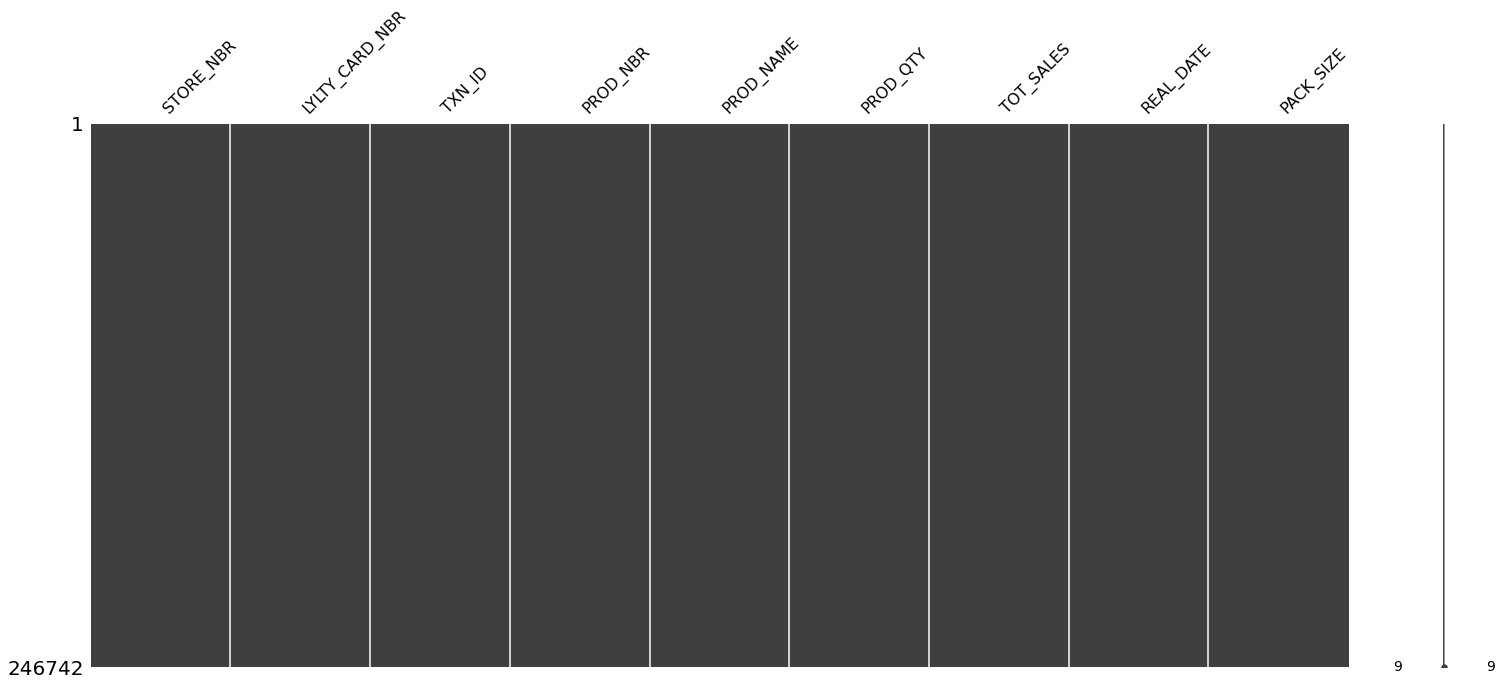

In [158]:
#Quick check for missing values looks good
msno.matrix(transactiondata)

In [159]:
#There is a transaction that contains 200 units
transactiondata['PROD_QTY'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

In [160]:
transactiondata.loc[transactiondata['PROD_QTY'] == 200, :]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE,PACK_SIZE
69762,226,226000,226201,4,dorito corn chp supreme,200,650.0,2018-08-21,380
69763,226,226000,226210,4,dorito corn chp supreme,200,650.0,2019-05-22,380


In [161]:
transactiondata.loc[transactiondata['LYLTY_CARD_NBR'] == 226000, :]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE,PACK_SIZE
69762,226,226000,226201,4,dorito corn chp supreme,200,650.0,2018-08-21,380
69763,226,226000,226210,4,dorito corn chp supreme,200,650.0,2019-05-22,380


In [162]:
#Drop the outlier as they're probably not a retail customer
transactiondata.drop(index=[69762, 69763], inplace=True)

In [163]:
#Double Check it worked
transactiondata.loc[transactiondata['LYLTY_CARD_NBR'] == 226000, :]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,REAL_DATE,PACK_SIZE


In [168]:
#We probably have a lot of repeat customers
transactiondata['LYLTY_CARD_NBR'].nunique()

71287

In [203]:
#Total sales per day, seens to be a day missing
total_sales = transactiondata.pivot_table(index='REAL_DATE', values='TOT_SALES', aggfunc='sum')
total_sales['TOT_SALES']


REAL_DATE
2018-07-03    4920.1
2018-07-04    4877.0
2018-07-05    4954.7
2018-07-06    4968.1
2018-07-07    4682.0
               ...  
2019-06-28    4829.7
2019-06-29    4941.3
2019-06-30    4876.6
2019-07-01    5177.6
2019-07-02    5108.4
Name: TOT_SALES, Length: 364, dtype: float64

In [179]:
pd.date_range(start="2018-07-01", end="2019-06-30").to_list()

[Timestamp('2018-07-01 00:00:00', freq='D'),
 Timestamp('2018-07-02 00:00:00', freq='D'),
 Timestamp('2018-07-03 00:00:00', freq='D'),
 Timestamp('2018-07-04 00:00:00', freq='D'),
 Timestamp('2018-07-05 00:00:00', freq='D'),
 Timestamp('2018-07-06 00:00:00', freq='D'),
 Timestamp('2018-07-07 00:00:00', freq='D'),
 Timestamp('2018-07-08 00:00:00', freq='D'),
 Timestamp('2018-07-09 00:00:00', freq='D'),
 Timestamp('2018-07-10 00:00:00', freq='D'),
 Timestamp('2018-07-11 00:00:00', freq='D'),
 Timestamp('2018-07-12 00:00:00', freq='D'),
 Timestamp('2018-07-13 00:00:00', freq='D'),
 Timestamp('2018-07-14 00:00:00', freq='D'),
 Timestamp('2018-07-15 00:00:00', freq='D'),
 Timestamp('2018-07-16 00:00:00', freq='D'),
 Timestamp('2018-07-17 00:00:00', freq='D'),
 Timestamp('2018-07-18 00:00:00', freq='D'),
 Timestamp('2018-07-19 00:00:00', freq='D'),
 Timestamp('2018-07-20 00:00:00', freq='D'),
 Timestamp('2018-07-21 00:00:00', freq='D'),
 Timestamp('2018-07-22 00:00:00', freq='D'),
 Timestamp

<AxesSubplot:xlabel='REAL_DATE'>

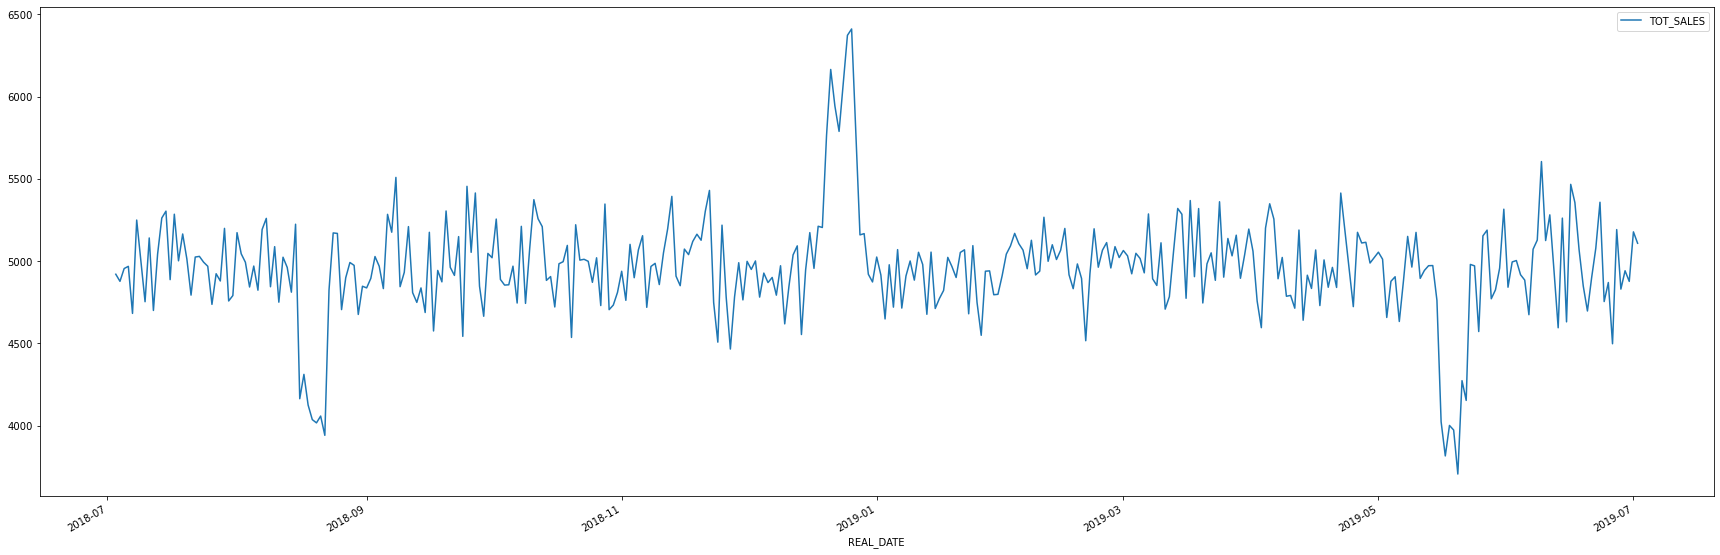

In [178]:
total_sales.plot(kind='line', figsize=[30,10])